## Hồi quy tuyến tính
### 1. Mô hình hồi quy tuyến tính
$$h(x) = \beta_0 + \beta_1x_1 + ... + \beta_n x_n$$ 

Để cho đơn giản ta có thể bổ sung tham số giả $x_0 = 1$. Khi đó công thức trên sẽ được viết lại như sau:

$$h(x) = \sum_{i=0}^{n} \beta_i x_i$$

### 2. Hàm lỗi
Ta có hàm lỗi như sau:
$$J(\beta) = \frac{1}{2} \sum_{i=1}^{m} (h(x_i) - y_i)^2$$
$$= \frac{1}{2} \sum_{i=1}^{m} (\sum_{j=0}^{n} (\beta_j x_{ij} - y_i)^2)$$

trong đó $m$ là số ví dụ trong tập huấn luyện. *Mục tiêu của việc huấn luyện mô hình* là xác định tham số $\beta_i$ sao cho hàm lỗi $J$ đạt giá trị nhỏ nhất.

### 3. Xác định tham số bằng cách giải phương trình tuyến tính
Cho dữ liệu có $m$ dữ liệu huấn luyện và mỗi dữ liệu huấn luyện có $n$ đặc trưng, ta có công thức giải phương trình tuyến tính sau đây:

$$\beta = (X^T X)^{-1} X^T Y$$

Với,

$X = 
\begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & \cdots & x_{1, n} \\
    1 & x_{2,1} & x_{2,2} & \cdots & x_{2, n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{m,1} & x_{m,2} & \cdots & x_{m, n}
\end{bmatrix}
$,

$Y = 
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m} \\
\end{bmatrix}
$,

$\beta = 
\begin{bmatrix}
    \beta_{0} & \beta_{1} & \cdots & \beta_{n}
\end{bmatrix}
$

Sau đây sẽ là một bài toán hồi quy tuyến tính sử dụng 80 dữ liệu mẫu, mỗi dữ liệu mẫu sẽ chỉ có 1 đặc trưng

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("1.01. Simple linear regression.csv")

In [188]:
x = data['SAT']
y = data['GPA']
X = np.array(x)
Y = np.array(y)

In [189]:
def normal_equation_linear_regression(X: np.array, Y: np.array) -> np.array:
    intercept_ones = np.ones((len(X), 1))
    X_b = np.c_[intercept_ones, X]
    beta_optimal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    return beta_optimal

In [190]:
beta_normal_equation = normal_equation_linear_regression(X, Y)
beta_normal_equation

array([0.2750403 , 0.00165569])

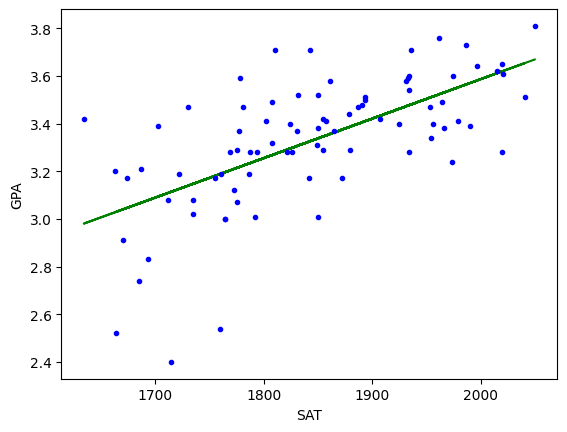

In [191]:

h_predict_normal_equation = [np.matrix([1, i]).dot(beta_normal_equation).flat[0] for i in x]
plt.plot(x, h_predict_normal_equation, "g-")
plt.plot(x, y, "b.")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

### 4. Xác định tham số bằng phương pháp giảm gradient
#### 4.1. Batch gradient descent
for (j = 0 to n) \{
    \
    $\beta_j$ &larr; $\beta_j + \alpha \sum_{i=1}^{m} (y_i - h(x_i))x_{ij}$
    \
\}

In [263]:
def batch_gradient_descent(X, Y, num_iterations, alpha):
    beta = [0, 0]
    for _ in range(num_iterations):
        H = np.array([])
        for i in X:
            H = np.append(H, beta[0] + beta[1] * i)
        beta[0] += alpha * np.sum(Y - H)
        beta[1] += alpha * np.sum((Y - H) * X)
    return beta

        



In [ ]:
beta_batch_gradient_descent = batch_gradient_descent(X, Y, 2, 0.01)
h_predict_batch_gradient_descent = np.array([])
for i in X:
    h_predict_batch_gradient_descent = np.append(
        h_predict_batch_gradient_descent, 
        beta_batch_gradient_descent[0] + beta_batch_gradient_descent[1] * i
    )
print(h_predict_batch_gradient_descent)
plt.plot(X, h_predict_batch_gradient_descent, "g-")
plt.plot(X, Y, "b.")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [285]:
def stochastic_gradient_descent(X, Y, alpha):
    m = len(Y)
    beta = [0, 0]
    for i in range(m):
        h = beta[0] + beta[1] * X[i]
        beta[0] += alpha * (Y[i] - h)
        beta[1] += alpha * (Y[i] - h) * X[i]
        print(beta)

In [286]:
print(stochastic_gradient_descent(X, Y, 1, 0.01))

[0.024, 41.136]
[-684.4540800000001, -1138930.3891200002]
[20044497.264372803, 35278380894.087814]
[-594420874013.0605, -1001597669309003.4]
[1.6956460064736152e+16, 2.8707291646468702e+19]
[-4.793949836005632e+20, -8.005892326096023e+23]
[1.4121919462199622e+25, 2.4911110994838593e+28]
[-4.394180172486852e+29, -7.75133382381617e+32]
[1.3889955188441501e+34, 2.48908120013917e+37]
[-4.6046627097010976e+38, -8.518634068998003e+41]
[1.4779374248103274e+43, 2.5642161366032416e+46]
[-4.551337326665697e+47, -8.078629667110856e+50]
[1.4015971890041997e+52, 2.4317693023282332e+55]
[-4.163050287464224e+56, -7.1271388686472755e+59]
[1.2636005072133161e+61, 2.2403662387821198e+64]
[-4.193840502549914e+65, -7.850881930164511e+68]
[1.3777882597228965e+70, 2.4180134888952017e+73]
[-4.047618179372855e+74, -6.775701672675947e+77]
[1.2480441766869338e+79, 2.2989041735674695e+82]
[-4.1057192976180083e+83, -7.332807675818363e+86]
[1.2912667850905672e+88, 2.2739197821845622e+91]
[-3.9155620295100923e+92, 

C:\Users\Admin\AppData\Local\Temp\ipykernel_9860\793952600.py:7: RuntimeWarning: overflow encountered in scalar multiply
  beta[1] += alpha * (Y[i] - h) * X[i]
C:\Users\Admin\AppData\Local\Temp\ipykernel_9860\793952600.py:7: RuntimeWarning: invalid value encountered in scalar add
  beta[1] += alpha * (Y[i] - h) * X[i]
